# Assignment 1

## Loading data

In [1]:
from aa import DataLoader
from aa import extract_features
from aa import check_output
import torch

In [2]:
device=torch.device('cuda:0')

In [3]:
dataset = DataLoader(data_dir="../DDICorpus/DDICorpus/", device=device)

processing data
reading in data...
data read
creating validation set...
validation set ready
data processed


In [4]:
dataset.data_df.head()

,sentence_id,token_id,char_start_id,char_end_id,split
1,DDI-DrugBank.d436.s0,1,0,1,val
2,DDI-DrugBank.d436.s0,2,3,6,train
3,DDI-DrugBank.d436.s0,3,9,19,val
4,DDI-DrugBank.d436.s0,4,21,30,train
5,DDI-DrugBank.d436.s0,5,33,36,train


In [5]:
dataset.ner_df.head()

,sentence_id,ner_id,char_start_id,char_end_id
1,DDI-DrugBank.d519.s0,1,45,52
2,DDI-DrugBank.d519.s1,1,66,73
3,DDI-DrugBank.d519.s2,1,0,7
4,DDI-DrugBank.d519.s3,1,29,36
5,DDI-DrugBank.d519.s3,2,83,94


In [6]:
dataset.vocab[:15]

['No',
 'drug',
 'nutritional',
 'supplement',
 'food',
 'or',
 'herb',
 'interactions',
 'have',
 'yet',
 'been',
 'reported',
 'formal',
 'drug/drug',
 'interaction']

In [7]:
dataset.id2ner

{0: 'None', 1: 'brand', 2: 'drug', 3: 'group', 4: 'drug_n'}

In [8]:
dataset.max_sample_length

50

In [9]:
dataset.get_random_sample()

/home/guspfame@GU.GU.SE/ML/A1/lt2316-h20-aa/aa/data_loading.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_tokens["token"] = sample_tokens.loc[:,"token_id"].apply(decode_word)


'Other concomitant therapies: In clinical trials the safety profile in subjects treated with DRUG:Acamprosate concomitantly with GROUP:anxiolytics GROUP:hypnotics and GROUP:sedatives (including GROUP:benzodiazepines) or GROUP:non-opioid GROUP:analgesics was similar to that of subjects taking placebo with these concomitant medications'

### Data Exploration

[Counter({0: 654, 2: 68, 3: 16, 1: 11, 4: 1}), Counter({0: 226, 2: 16, 3: 6, 1: 2}), Counter()]
{0: 'None', 1: 'brand', 2: 'drug', 3: 'group', 4: 'drug_n'}


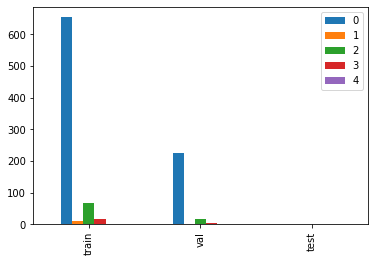

In [10]:
dataset.plot_split_ner_distribution()

### Labels

In [11]:
train_y, val_y, test_y = check_output(dataset.get_y())

## Extracting Features

In [12]:
train_X, val_X, test_X = check_output(extract_features(
                                                        data=dataset.data_df,
                                                        max_sample_length=dataset.max_sample_length,
                                                        id2word=dataset.id2word
                                                        #Add any addtional arguments here
                                                       ))

     split word_len  neighbour_l  neighbour_r  capital
1      val        1          0.0          2.0      1.0
3      val       10          2.0          4.0      0.0
13     val        1          0.0         13.0      1.0
20     val        3         18.0         20.0      0.0
21     val        8         19.0          0.0      0.0
...    ...      ...          ...          ...      ...
1012   val        8         27.0          0.0      0.0
1015   val        5         56.0        456.0      0.0
1020   val        2        452.0        120.0      0.0
1026   val       12          0.0         73.0      1.0
1030   val        5        461.0          0.0      0.0

[257 rows x 5 columns]


TypeError: 'NoneType' object is not iterable

## Bonus Part: Explore Some more

In [ ]:
#uncomment the code below if you want to do bonus part

In [ ]:
#dataset.plot_ner_per_sample_distribution()

In [ ]:
#dataset.plot_sample_length_distribution()

In [ ]:
#dataset.plot_ner_cooccurence_venndiagram()